In [ ]:
!sudo add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!sudo apt-get update -qq 2>&1 > /dev/null
!sudo apt -y install -qq google-drive-ocamlfuse 2>&1 > /dev/null
!google-drive-ocamlfuse



debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: www-browser: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links2: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: elinks: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: links: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: lynx: not found
/usr/bin/xdg-open: 851: /usr/bin/xdg-open: w3m: not found
xdg-open: no method available for opening 'https://accounts.google.com/o/oauth2/auth?client_id=564921029129.apps.googleusercontent.com&redirect_uri=https%3A%2F%2Fgd-ocaml-auth.appspot.

In [ ]:
!sudo apt-get install -qq w3m # to act as web browser 
!xdg-settings set default-web-browser w3m.desktop # to set default browser
%cd /content
!mkdir drive
%cd drive
!mkdir MyDrive
%cd ..
%cd ..
!google-drive-ocamlfuse /content/drive/MyDrive

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package w3m.
(Reading database ... 124021 files and directories currently installed.)
Preparing to unpack .../w3m_0.5.3-36build1_amd64.deb ...
Unpacking w3m (0.5.3-36build1) ...
Setting up w3m (0.5.3-36build1) ...
Processing triggers for mime-support (3.60ubuntu1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
/content
/content/drive
/content
/
Access token retrieved correctly.


In [ ]:
!pip install vit-keras
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=362bc54c1d1610ed55226e960d9f4e4d6e5ca95f3298e9244edf8f0522f711be
  Stored in directory: /root/.cache/pip/wheels/19/09/72/3eb74d236bb48bd0f3c6c3c83e4e0c5bbfcbcad7c6c3539db8
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 14.4 MB/s 


In [ ]:
!git clone https://github.com/rishigami/Swin-Transformer-TF.git

import sys
sys.path.append('/content/Swin-Transformer-TF')
from swintransformer import SwinTransformer

In [ ]:
import os
import numpy as np
import cv2
import pandas as pd
import tensorflow as tf
#import tensorflow_addons as tfa
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split
from vit_keras import vit, utils, visualize
import sklearn

In [ ]:
data_dir_lung = '/content/drive/MyDrive/Datasets/lung_colon_image_set/lung_image_sets'
data_dir_colon = '/content/drive/MyDrive/Datasets/lung_colon_image_set/colon_image_sets'

In [ ]:
def convert_to_array(data_path, folder):
  data_mat =[]
  folder_data_path = os.path.join(data_path, folder)
  for image in sorted(os.listdir(folder_data_path)):
    print(image)
    image_mat = cv2.imread(os.path.join(data_path, folder, image))
    data_mat.append(cv2.resize(image_mat, (224, 224)))
    #data_mat.append(image_mat)
  return np.array(data_mat)

In [ ]:
def extract_the_data(data_path):
  lung_aca =[] 
  lung_n = []
  lung_scc = []
  colon_aca = []
  colon_n =[]
  for folder in os.listdir(data_path):
    if folder.endswith('g_aca'):
      print(f'extracting data for {folder}')
      lung_aca = convert_to_array(data_path, folder)
    elif folder.endswith('g_n'):
      print(f'extracting data for {folder}') 
      lung_n = convert_to_array(data_path, folder)
    elif folder.endswith('g_scc'):
      print(f'extracting data for {folder}')
      lung_scc = convert_to_array(data_path, folder)
    elif folder.endswith('n_aca'):
      print(f'extracting data for {folder}')
      colon_aca = convert_to_array(data_path, folder)
    else:
      print(f'extracting data for {folder}')
      colon_n = convert_to_array(data_path, folder)
  return np.array(lung_aca), np.array(lung_n), np.array(lung_scc), np.array(colon_aca), np.array(colon_n)

In [ ]:
lung_aca, lung_n, lung_scc, _, _ = extract_the_data(data_dir_lung)
_, _, _, colon_aca, colon_n = extract_the_data(data_dir_colon)

In [ ]:
lung_aca_labels = np.zeros(len(lung_aca))
lung_n_labels = np.ones(len(lung_n))
lung_scc_labels = 2 * np.ones(len(lung_scc))

colon_aca_labels = 3 * np.ones(len(colon_aca))
colon_n_labels = 4 * np.ones(len(colon_n))

In [ ]:
X = np.concatenate((lung_aca, lung_n, lung_scc, colon_aca, colon_n))
y = np.concatenate((lung_aca_labels, lung_n_labels, lung_scc_labels, colon_aca_labels, colon_n_labels))

In [ ]:
np.save('/content/drive/MyDrive/Datasets/lung_colon_image_set/X.npy', X)
np.save('/content/drive/MyDrive/Datasets/lung_colon_image_set/y.npy', y)

In [ ]:
X = np.load('/content/drive/MyDrive/Datasets/lung_colon_image_set/X.npy')
y = np.load('/content/drive/MyDrive/Datasets/lung_colon_image_set/y.npy')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
IMAGE_SIZE = [224, 224, 3]
#NUM_CLASSES = len(np.unique(y_train))

#base_model = SwinTransformer('swin_base_224', include_top=False, pretrained=True)
base_model = tf.keras.applications.EfficientNetV2L(include_top = False, input_shape = IMAGE_SIZE, include_preprocessing = True)

#model = tf.keras.Sequential()
#model.add(base_model)
gap = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
softmax = tf.keras.layers.Dense(5, activation = 'softmax')(gap)
model = tf.keras.Model(inputs = base_model.input, outputs = softmax)

473176280/473176280 [==============================] - 5s 0us/step


In [ ]:
start = 0
for layer in base_model.layers:
  start = start + 1
  if start >= int(0.5*(len(base_model.layers))):
    layer.trainable = False

In [ ]:
model.summary() # Displaying model summary

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
model.layers[0].layers[-3].output # Useful when dealing with gradCAM

<KerasTensor: shape=(None, 7, 7, 1280) dtype=float32 (created by layer 'top_conv')>

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.1)

Epoch 1/5
563/563 [==============================] - 209s 293ms/step - loss: 0.2473 - accuracy: 0.9424 - val_loss: 0.0263 - val_accuracy: 0.9920
Epoch 2/5
563/563 [==============================] - 159s 282ms/step - loss: 0.0208 - accuracy: 0.9944 - val_loss: 0.0052 - val_accuracy: 0.9985
Epoch 3/5
563/563 [==============================] - 159s 282ms/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0026 - val_accuracy: 0.9990
Epoch 4/5
563/563 [==============================] - 159s 282ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.0021 - val_accuracy: 0.9990
Epoch 5/5
563/563 [==============================] - 159s 282ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9995


In [ ]:
model.save('/content/drive/MyDrive/Datasets/lung_colon_image_set/trained-models-fapi/efficientnetv2l-224-adadelta-0.1-32-5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/lung_colon_image_set/trained-models-fapi/efficientnetv2m-224-adadelta-0.1-32-5')

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

157/157 [==============================] - 14s 87ms/step - loss: 0.0012 - accuracy: 0.9996
Test loss: 0.0012074648402631283
Test accuracy: 0.9995999932289124


In [ ]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob, axis = 1)

157/157 [==============================] - 42s 194ms/step


In [ ]:
print(f'Accuracy {sklearn.metrics.accuracy_score(y_test, y_pred)}')

if 1:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_prob, average = 'weighted', multi_class='ovr')
else:
  AUC = sklearn.metrics.roc_auc_score(y_test, y_pred)
print(f'AUC is {AUC}')

target_names = ['Lung_aca', 'Lung_n', 'Lung_scc', 'Colon_aca', 'Colon_n']

print('F1-score', sklearn.metrics.f1_score(y_test, y_pred, average = 'weighted'))
print(f'Balanced accuracy {sklearn.metrics.balanced_accuracy_score(y_test, y_pred)}')
#print('Average-precision-score', sklearn.metrics.average_precision_score(y_test, y_prob, average = 'weighted'))
print(f'MCC {sklearn.metrics.matthews_corrcoef(y_test, y_pred)}')
print(f'{sklearn.metrics.classification_report(y_test, y_pred, target_names=target_names)}')
#print(f'{sklearn.metrics.precision_recall_fscore_support(y_test, y_prob)}')

Accuracy 0.9994
AUC is 0.9999995996916565
F1-score 0.9994000052202304
Balanced accuracy 0.9994051815429283
MCC 0.9992500208648407
              precision    recall  f1-score   support

    Lung_aca       1.00      1.00      1.00      1021
      Lung_n       1.00      1.00      1.00      1000
    Lung_scc       1.00      1.00      1.00       985
   Colon_aca       1.00      1.00      1.00       989
     Colon_n       1.00      1.00      1.00      1005

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



# Plotting the confusion matrix

[[0.99804114 0.         0.00195886 0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.00101523 0.         0.99898477 0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


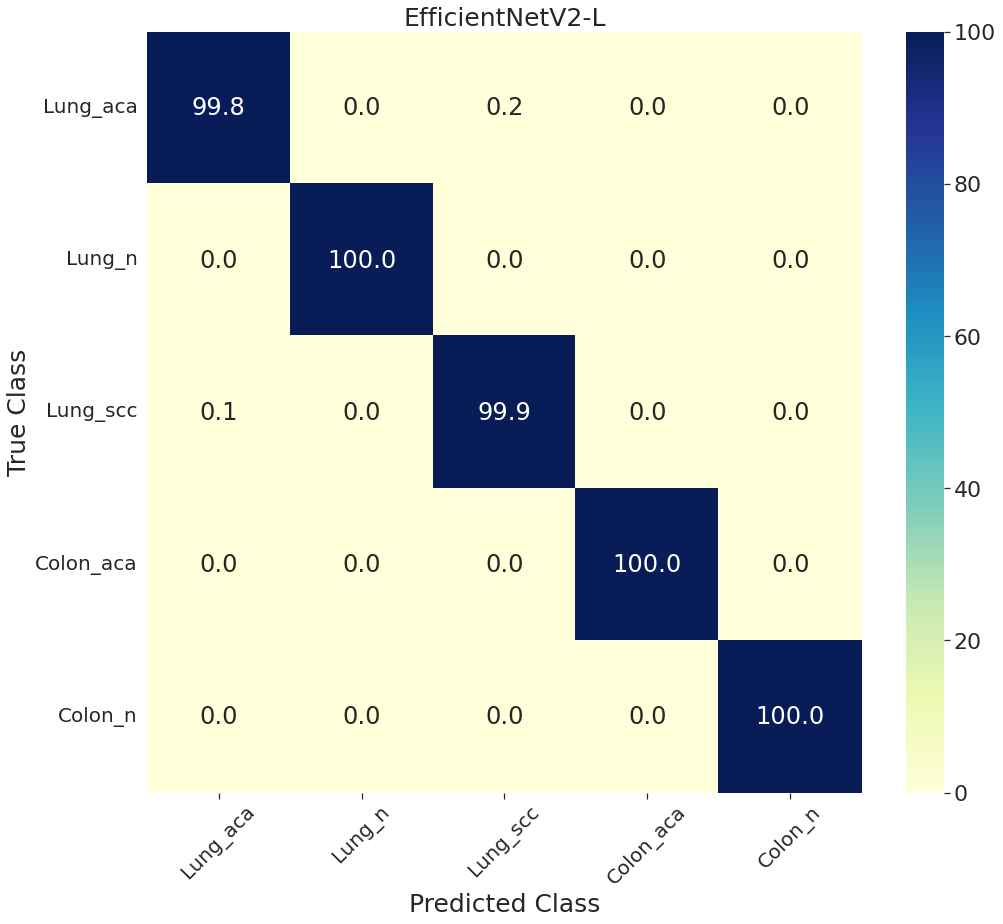

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred, normalize = 'true')
#confusion_mat[1, 0] = 6
#confusion_mat[1, 1] = 296
if 1:
  class_names = ['Lung_aca', 'Lung_n', 'Lung_scc', 'Colon_aca', 'Colon_n']
else:
  class_names = ['Bad', 'Good']
print(confusion_mat)

# Plotting multilabel confusion matrix in a beautiful manner
sns.set(font_scale=2)
if 1:
  fig = plt.figure(figsize=(16, 14))
else:
  fig = plt.figure(figsize = (8,6))
ax= plt.subplot()
sns.heatmap(confusion_mat*100, annot=True, vmin = 0, vmax = 100, ax = ax, cmap = 'YlGnBu', fmt = '2.1f'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted Class', fontsize=25)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=45)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Class', fontsize=25)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

plt.title('EfficientNetV2-L', fontsize=25)

plt.show()

# Making gradCAM

In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output] # Customized for EffNetV2
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Create superimposed information

In [ ]:
def save_and_display_gradcam(img, heatmap, cam_path="cam.jpg", alpha=1.0):

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

label: 0.0


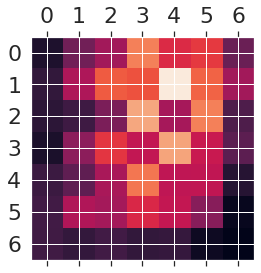

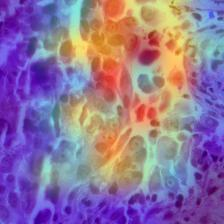

In [ ]:
# 3050 for label 0, 2222 for label 1, 1006 for label 2, 2389 for label 3, 1007 for label 4
index = 3050
img_array = np.expand_dims(X_test[index, :, :, :], axis = 0)
print('label:', y_test[index])

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'top_conv')

# Display heatmap
plt.matshow(heatmap)
plt.show()

save_and_display_gradcam(np.squeeze(img_array), heatmap)